In [1]:
import pandas as pd

In [3]:
af= pd.read_csv(r"C:\Imatrius Learning\3 Python\AmazonFoodReviews.csv" )
af.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
af= af.loc[: ,['Score' ,'Text']]

In [7]:
af.rename(columns={'Score':'Y' , 'Text':'X'},inplace=True)

In [10]:
af.head(2)

,Y,X
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...


In [12]:
af['X'] =af['X'].str.lower()

In [13]:
af.Y.replace({2:1,3:2,4:2,5:2},inplace=True)

C:\Users\ashish\AppData\Local\Temp\ipykernel_13144\434856316.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  af.Y.replace({2:1,3:2,4:2,5:2},inplace=True)


In [16]:
import nltk
from nltk.corpus import stopwords

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
l1 =list(stopwords.words('english'))
l1

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
len(stopwords.words('english'))

179

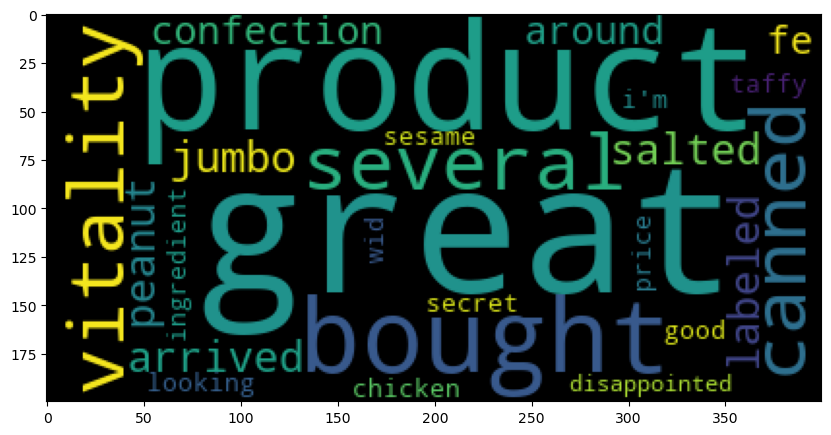

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud =WordCloud(stopwords =stopwords.words('english') , max_words=25).generate(str(af.X))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [14]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [15]:
def text_process(mess): # creating a function         #TDM
   '''
   1.remove the punctutation
   2.remove the stopwords
   3.return the list of clean textwords
   '''

   nopunc = [char for char in mess if char not in string.punctuation]
   nopunc = ''.join(nopunc)

   return [ word for word in nopunc.split() if word not in l1]

In [ ]:
af['X'].apply(text_process)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

In [34]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(af['X'])

In [35]:
bow_transformer.vocabulary_

{'bought': 35857,
 'several': 191850,
 'vitality': 229827,
 'canned': 42395,
 'dog': 69985,
 'food': 87189,
 'products': 172594,
 'found': 88450,
 'good': 95108,
 'quality': 175518,
 'product': 172343,
 'looks': 132324,
 'like': 130309,
 'stew': 204098,
 'processed': 172170,
 'meat': 137919,
 'smells': 196972,
 'better': 31728,
 'labrador': 127070,
 'finicky': 84290,
 'appreciates': 23175,
 'arrived': 24124,
 'labeled': 126924,
 'jumbo': 123471,
 'salted': 186534,
 'peanutsthe': 162728,
 'peanuts': 162695,
 'actually': 15812,
 'small': 196667,
 'sized': 195465,
 'unsalted': 225858,
 'sure': 208961,
 'error': 77454,
 'vendor': 228603,
 'intended': 119211,
 'represent': 181173,
 'confection': 55158,
 'around': 24006,
 'centuries': 45428,
 'light': 130088,
 'pillowy': 165773,
 'citrus': 50548,
 'gelatin': 92424,
 'nuts': 152690,
 'case': 44135,
 'filberts': 83761,
 'cut': 61676,
 'tiny': 218077,
 'squares': 202312,
 'liberally': 129676,
 'coated': 51763,
 'powdered': 169667,
 'sugar': 207

In [36]:
len(bow_transformer.vocabulary_)

240626

In [43]:
message_bow =bow_transformer.transform(af.X)

In [44]:
message_bow.shape

(568454, 240626)

In [45]:
type(message_bow) 

scipy.sparse._csr.csr_matrix

In [46]:
from sklearn.model_selection import train_test_split

af_train_x,af_test_x,af_train_y,af_test_y = train_test_split(message_bow ,af['X'], test_size=.2)

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [48]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(af_train_x , af_train_y)
pred_test = logreg.predict(af_test_x)
pred_test
tab1 = confusion_matrix(af_test_y , pred_test)
print(tab1)
print(classification_report(af_test_y , pred_test))

MemoryError: Unable to allocate 583. GiB for an array with shape (325457, 240627) and data type float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(af_train_x , af_train_y)
pred_test = rf.predict(af_test_x)
pred_test
tab1 = confusion_matrix(af_test_y , pred_test)
print(tab1)
print(classification_report(af_test_y , pred_test))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(af_train_x , af_train_y)
pred_test = dt.predict(af_test_x)
pred_test
tab1 = confusion_matrix(af_test_y , pred_test)
print(tab1)
print(classification_report(af_test_y , pred_test))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(af_train_x , af_train_y)
pred_nb = nb.predict(af_test_x)
tab1 = confusion_matrix(af_test_y , pred_test)
print(tab1)
print(classification_report(af_test_y , pred_test))